In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [0]:

GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/dogsvscats/"
training_data_dir = path + "train" 


test_data_dir = path + "test" 



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping





In [0]:
img_width, img_height = 256, 256
nb_train_samples = 500
nb_validation_samples = 100 
batch_size = 16
epochs = 50

In [0]:

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [0]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="sigmoid")(x)
# creating the final model 
model = Model(input = model.input, output = predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [0]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)


In [0]:
train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

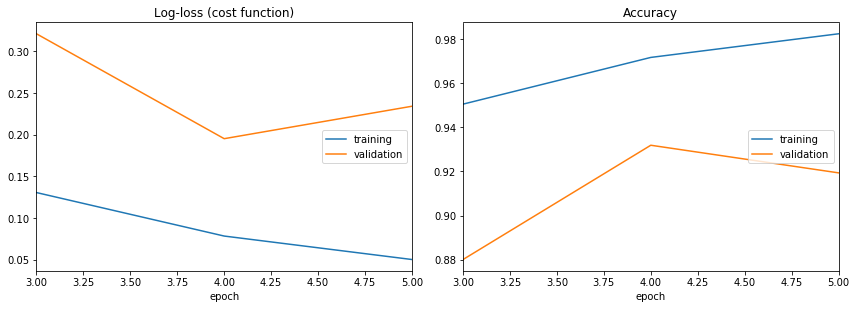

Log-loss (cost function):
training   (min:    0.050, max:    0.561, cur:    0.050)
validation (min:    0.195, max:    0.430, cur:    0.234)

Accuracy:
training   (min:    0.695, max:    0.982, cur:    0.982)
validation (min:    0.810, max:    0.932, cur:    0.919)


In [0]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 500,
                         epochs = 5,
                         validation_data=validation_generator,
                         validation_steps=100,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)


In [0]:
img_width, img_height = 299, 299
nb_train_samples = 500
nb_validation_samples = 100 
batch_size = 16
epochs = 50

In [0]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
base_model = InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
# summarize the model
base_model.summary()














Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________

In [0]:
train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
from keras.layers import Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout

In [0]:
x = base_model.output
x = AveragePooling2D((8, 8), border_mode='valid', name='avg_pool')(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(input=base_model.input, output=predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D((8, 8), name="avg_pool", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


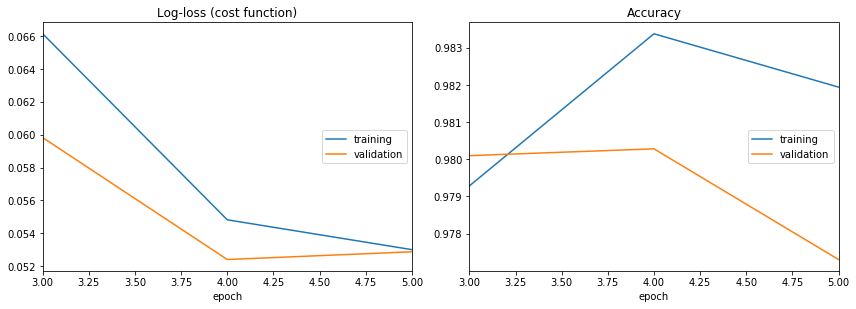

Log-loss (cost function):
training   (min:    0.053, max:    0.270, cur:    0.053)
validation (min:    0.052, max:    0.098, cur:    0.053)

Accuracy:
training   (min:    0.894, max:    0.983, cur:    0.982)
validation (min:    0.973, max:    0.980, cur:    0.977)


In [0]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 500,
                         epochs = 5,
                         validation_data=validation_generator,
                         validation_steps=100,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)


In [0]:
img_width, img_height = 227, 227
nb_train_samples = 500
nb_validation_samples = 100 
batch_size = 16
epochs = 50
